https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/inverse-transform-sampling-method


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import pylab
from scipy.interpolate import spline

%matplotlib inline

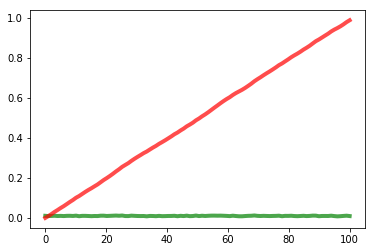

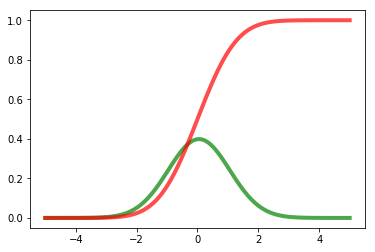

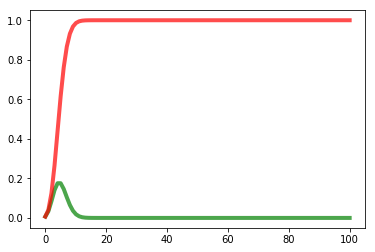

In [101]:
np.random.seed(1)

def gaussPDF(x, mean, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mean)**2 / (2 * sigma**2))

def normalPDF(x):
    return gaussPDF(x, 0, 1)

def poissonPDF(k, _lambda):
    return pow(_lambda, k) * np.exp(-_lambda) / np.math.factorial(k)

def uniformDist(min_x, max_x):
    numSamples = 10000
    numPieces = 100
    samples = np.zeros(numSamples)
    pieces = np.zeros(numPieces)
    for i in range(numSamples):
        x = min_x + (max_x - min_x) * np.random.random()
        samples[i] = x
    min_x = np.min(samples)
    max_x = np.max(samples)
    for i in range(numSamples):
        indexPiece = int(numPieces * (samples[i] - min_x) / (max_x - min_x))
        indexPiece = min(indexPiece, numPieces - 1)
        pieces[indexPiece] += 1;
    pieces /= np.sum(pieces)
    cdfs = np.zeros(numPieces)
    for i in range(1, numPieces):
        cdfs[i] = cdfs[i - 1] + pieces[i]    
    X = np.linspace(0, numPieces, numPieces)
    Y = pieces
    #plt.ylim(0, 0.02)
    plt.plot(X, Y, 'g-', lw=4, alpha=0.7, label='naive')
    Y = cdfs
    plt.plot(X, Y, 'r-', lw=4, alpha=0.7, label='naive')
    plt.show()

def normalDist(min_x, max_x):
    numSamples = 100
    pdfs = np.zeros(numSamples)
    cdfs = np.zeros(numSamples)
    for i in range(numSamples):
        x = min_x + (max_x - min_x) * i / numSamples
        pdf = normalPDF(x)
        pdfs[i] = pdf
        if i >= 0:
            dx = (max_x - min_x) / numSamples
            cdfs[i] = cdfs[i - 1] + pdf * dx
    X = np.linspace(min_x, max_x, numSamples)
    Y = pdfs
    plt.plot(X, Y, 'g-', lw=4, alpha=0.7, label='naive')
    Y = cdfs
    plt.plot(X, Y, 'r-', lw=4, alpha=0.7, label='naive')
    plt.show()
    
def poissonDist():
    _lambda = 5
    numSamples = 100
    pdfs = np.zeros(numSamples)
    cdfs = np.zeros(numSamples)
    for i in range(numSamples):
        pdf = poissonPDF(i, _lambda)
        pdfs[i] = pdf
        if i >= 0:
            cdfs[i] = cdfs[i - 1] + pdf
    X = np.linspace(0, numSamples, numSamples)
    Y = pdfs
    plt.plot(X, Y, 'g-', lw=4, alpha=0.7, label='naive')
    Y = cdfs
    plt.plot(X, Y, 'r-', lw=4, alpha=0.7, label='naive')
    plt.show()
    
uniformDist(-5, 5)
normalDist(-5, 5)
poissonDist()
#Xnew = np.linspace(np.min(X),np.max(X),100) 
#Ynew = spline(X,Y,Xnew)
#plt.plot(Xnew, Ynew, 'b-', lw=1, alpha=1, label='spline')
#plt.show()
